<a href="https://colab.research.google.com/github/kd303/tensorflow_coursera/blob/master/text_analytics%5CCourse_4_Week_2_Exercise_Question_bbc_Corpus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import csv
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/bbc-text.csv \
    -O /tmp/bbc-text.csv

--2019-08-16 09:42:34--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/bbc-text.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.167.128, 2a00:1450:400c:c08::80
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.167.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5057493 (4.8M) [application/octet-stream]
Saving to: ‘/tmp/bbc-text.csv’

/tmp/bbc-text.csv   100%[===================>]   4.82M  --.-KB/s    in 0.03s   

2019-08-16 09:42:35 (175 MB/s) - ‘/tmp/bbc-text.csv’ saved [5057493/5057493]



In [0]:
vocab_size = 50000 # YOUR CODE HERE
embedding_dim = 16 # YOUR CODE HERE
max_length = 250 # YOUR CODE HERE
trunc_type = 'post'# YOUR CODE HERE
padding_type = 'post'# YOUR CODE HERE
oov_tok = '<oov>'# YOUR CODE HERE
training_portion = .8

In [5]:
sentences = []
labels = []
stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]
print(len(stopwords))
# Expected Output
# 153

153


In [6]:
with open("/tmp/bbc-text.csv", 'r') as csvfile:
    # YOUR CODE HERE
  csvreader = csv.reader(csvfile, delimiter = ',')
  next(csvreader)
  for row in csvreader:
    labels.append(row[0])
    sentences.append(row[1])

csvfile.close()
    
print(len(labels))
print(len(sentences))
print(sentences[0])
print(labels[0])
# Expected Output
# 2225
# 2225
# tv future hands viewers home theatre systems  plasma high-definition tvs  digital video recorders moving living room  way people watch tv will radically different five years  time.  according expert panel gathered annual consumer electronics show las vegas discuss new technologies will impact one favourite pastimes. us leading trend  programmes content will delivered viewers via home networks  cable  satellite  telecoms companies  broadband service providers front rooms portable devices.  one talked-about technologies ces digital personal video recorders (dvr pvr). set-top boxes  like us s tivo uk s sky+ system  allow people record  store  play  pause forward wind tv programmes want.  essentially  technology allows much personalised tv. also built-in high-definition tv sets  big business japan us  slower take off europe lack high-definition programming. not can people forward wind adverts  can also forget abiding network channel schedules  putting together a-la-carte entertainment. us networks cable satellite companies worried means terms advertising revenues well  brand identity  viewer loyalty channels. although us leads technology moment  also concern raised europe  particularly growing uptake services like sky+.  happens today  will see nine months years  time uk   adam hume  bbc broadcast s futurologist told bbc news website. likes bbc  no issues lost advertising revenue yet. pressing issue moment commercial uk broadcasters  brand loyalty important everyone.  will talking content brands rather network brands   said tim hanlon  brand communications firm starcom mediavest.  reality broadband connections  anybody can producer content.  added:  challenge now hard promote programme much choice.   means  said stacey jolna  senior vice president tv guide tv group  way people find content want watch simplified tv viewers. means networks  us terms  channels take leaf google s book search engine future  instead scheduler help people find want watch. kind channel model might work younger ipod generation used taking control gadgets play them. might not suit everyone  panel recognised. older generations comfortable familiar schedules channel brands know getting. perhaps not want much choice put hands  mr hanlon suggested.  end  kids just diapers pushing buttons already - everything possible available   said mr hanlon.  ultimately  consumer will tell market want.   50 000 new gadgets technologies showcased ces  many enhancing tv-watching experience. high-definition tv sets everywhere many new models lcd (liquid crystal display) tvs launched dvr capability built  instead external boxes. one example launched show humax s 26-inch lcd tv 80-hour tivo dvr dvd recorder. one us s biggest satellite tv companies  directtv  even launched branded dvr show 100-hours recording capability  instant replay  search function. set can pause rewind tv 90 hours. microsoft chief bill gates announced pre-show keynote speech partnership tivo  called tivotogo  means people can play recorded programmes windows pcs mobile devices. reflect increasing trend freeing multimedia people can watch want  want.

2225
2225
tv future in the hands of viewers with home theatre systems  plasma high-definition tvs  and digital video recorders moving into the living room  the way people watch tv will be radically different in five years  time.  that is according to an expert panel which gathered at the annual consumer electronics show in las vegas to discuss how these new technologies will impact one of our favourite pastimes. with the us leading the trend  programmes and other content will be delivered to viewers via home networks  through cable  satellite  telecoms companies  and broadband service providers to front rooms and portable devices.  one of the most talked-about technologies of ces has been digital and personal video recorders (dvr and pvr). these set-top boxes  like the us s tivo and the uk s sky+ system  allow people to record  store  play  pause and forward wind tv programmes when they want.  essentially  the technology allows for much more personalised tv. they are also being built-i

In [7]:
sentence_len = list(len(sentence) for sentence in sentences)

print(sentence_len)


[4333, 1842, 1342, 2176, 1579, 3533, 1486, 1051, 983, 1248, 1819, 1198, 1858, 1567, 2411, 1704, 2380, 2376, 1731, 2674, 1298, 2142, 3326, 824, 3775, 1219, 1444, 1593, 3519, 2235, 2845, 3718, 1264, 1647, 912, 1574, 1003, 1763, 2998, 1540, 2281, 1794, 2295, 1025, 1941, 7536, 2929, 3376, 1301, 992, 1224, 3196, 1863, 1567, 1719, 1102, 3060, 3364, 2415, 2866, 2978, 1869, 1446, 942, 1032, 2525, 1463, 2171, 1380, 2124, 3506, 1239, 2741, 1290, 1203, 3586, 2445, 3032, 1111, 1596, 1411, 1043, 1843, 1347, 1418, 1567, 1958, 1950, 3071, 1276, 1417, 719, 3835, 1278, 2918, 758, 1368, 3706, 1185, 3236, 1169, 2194, 5152, 3274, 2230, 2152, 872, 1687, 1500, 4041, 1950, 1641, 891, 1370, 831, 1332, 950, 2378, 3120, 2651, 933, 961, 1827, 3046, 1565, 1800, 3457, 1072, 3018, 2094, 2452, 2512, 1700, 1787, 1685, 2749, 948, 1765, 1584, 1345, 4042, 2291, 4692, 2042, 2172, 1826, 2964, 1412, 2408, 4390, 1582, 2590, 1418, 2016, 2937, 4213, 1932, 2477, 1907, 1622, 1356, 4896, 2926, 1078, 2211, 1708, 1541, 3143, 3632,

25483
501


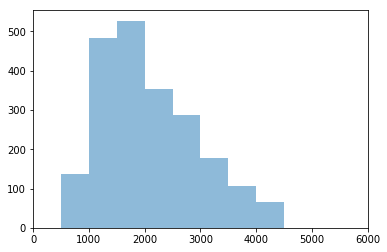

In [8]:
import matplotlib.pyplot as plt
sent_array = np.array(sentence_len)
bins = np.arange(-5000, 5000, 500)
plt.xlim([min(sent_array)-500, 6000]) #max(sent_array)+500]
plt.hist(sent_array, bins=bins, alpha=0.5)


print(max(sent_array))
print(min(sent_array))

In [9]:
train_size = int(training_portion * len(sentences))# YOUR CODE HERE

train_sentences = sentences[:train_size]# YOUR CODE HERE
train_labels = labels[:train_size]# YOUR CODE HERE

validation_sentences = sentences[train_size:]# YOUR CODE HERE
validation_labels = labels[train_size:]# YOUR CODE HERE

print(train_size)
print(len(train_sentences))
print(len(train_labels))
print(len(validation_sentences))
print(len(validation_labels))

# Expected output (if training_portion=.8)
# 1780
# 1780
# 1780
# 445
# 445

1780
1780
1780
445
445


In [10]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok) # YOUR CODE HERE
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index# YOUR CODE HERE

train_sequences = tokenizer.texts_to_sequences(train_sentences) # YOUR CODE HERE
train_padded = pad_sequences(train_sequences,maxlen=max_length, truncating=trunc_type) # YOUR CODE HERE

print(len(train_sequences[0]))
print(len(train_padded[0]))

print(len(train_sequences[1]))
print(len(train_padded[1]))

print(len(train_sequences[10]))
print(len(train_padded[10]))

# Expected Ouput
# 449
# 120
# 200
# 120
# 192
# 120

750
250
300
250
311
250


In [11]:
validation_sequences = tokenizer.texts_to_sequences(validation_sentences) # YOUR CODE HERE
validation_padded =   pad_sequences(validation_sequences,maxlen=max_length, truncating=trunc_type) # YOUR CODE HERE

print(len(validation_sequences))
print(validation_padded.shape)

# Expected output
# 445
# (445, 120)

445
(445, 250)


In [12]:
label_tokenizer = Tokenizer() # YOUR CODE HERE
label_tokenizer.fit_on_texts(labels)

training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels)) # YOUR CODE HERE
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(validation_labels)) # YOUR CODE HERE

print(training_label_seq[0])
print(training_label_seq[1])
print(training_label_seq[2])
print(training_label_seq.shape)

print(validation_label_seq[0])
print(validation_label_seq[1])
print(validation_label_seq[2])
print(validation_label_seq.shape)

# Expected output
# [4]
# [2]
# [1]
# (1780, 1)
# [5]
# [4]
# [3]
# (445, 1)

[4]
[2]
[1]
(1780, 1)
[5]
[4]
[3]
(445, 1)


In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(48, activation = 'relu'),
    tf.keras.layers.Dense(6, activation = 'softmax')
# YOUR CODE HERE
])
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

# Expected Output
# Layer (type)                 Output Shape              Param #   
# =================================================================
# embedding (Embedding)        (None, 120, 16)           16000     
# _________________________________________________________________
# global_average_pooling1d (Gl (None, 16)                0         
# _________________________________________________________________
# dense (Dense)                (None, 24)                408       
# _________________________________________________________________
# dense_1 (Dense)              (None, 6)                 150       
# =================================================================
# Total params: 16,558
# Trainable params: 16,558
# Non-trainable params: 0

W0816 09:46:42.392117 140417993099136 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/initializers.py:119: calling RandomUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0816 09:46:42.400912 140417993099136 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 250, 16)           800000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 48)                816       
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 294       
Total params: 801,110
Trainable params: 801,110
Non-trainable params: 0
_________________________________________________________________


In [15]:
num_epochs = 30
history = model.fit(train_padded, training_label_seq, epochs=num_epochs, validation_data=(validation_padded, validation_label_seq), verbose=2)

Train on 1780 samples, validate on 445 samples
Epoch 1/30
1780/1780 - 1s - loss: 1.7509 - acc: 0.2309 - val_loss: 1.6937 - val_acc: 0.2270
Epoch 2/30
1780/1780 - 0s - loss: 1.6111 - acc: 0.3006 - val_loss: 1.5249 - val_acc: 0.4067
Epoch 3/30
1780/1780 - 0s - loss: 1.3950 - acc: 0.4320 - val_loss: 1.2859 - val_acc: 0.4382
Epoch 4/30
1780/1780 - 0s - loss: 1.1264 - acc: 0.5236 - val_loss: 1.0487 - val_acc: 0.6067
Epoch 5/30
1780/1780 - 0s - loss: 0.8895 - acc: 0.7096 - val_loss: 0.8462 - val_acc: 0.8225
Epoch 6/30
1780/1780 - 0s - loss: 0.6797 - acc: 0.8831 - val_loss: 0.6622 - val_acc: 0.9146
Epoch 7/30
1780/1780 - 0s - loss: 0.4836 - acc: 0.9579 - val_loss: 0.4964 - val_acc: 0.9281
Epoch 8/30
1780/1780 - 0s - loss: 0.3244 - acc: 0.9758 - val_loss: 0.3798 - val_acc: 0.9393
Epoch 9/30
1780/1780 - 0s - loss: 0.2167 - acc: 0.9865 - val_loss: 0.3029 - val_acc: 0.9528
Epoch 10/30
1780/1780 - 0s - loss: 0.1492 - acc: 0.9899 - val_loss: 0.2504 - val_acc: 0.9551
Epoch 11/30
1780/1780 - 0s - los

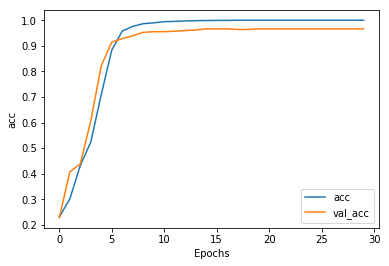

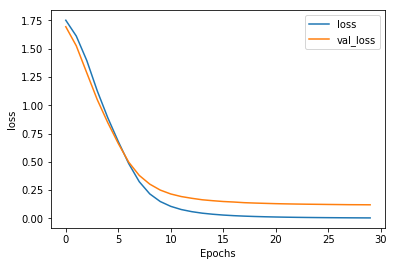

In [16]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "acc")
plot_graphs(history, "loss")

In [0]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
  
    return ' '.join([reverse_word_index.get(i, '?') for i in text])


In [18]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

# Expected output
# (1000, 16)

(50000, 16)


In [0]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [0]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')